In [1]:
import torch
import aditmaz95

In [2]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [3]:
X = torch.rand((2, 5))
X_prob=aditmaz95.softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1955, 0.2070, 0.1752, 0.2360, 0.1863],
         [0.1947, 0.2560, 0.1539, 0.2241, 0.1714]]),
 tensor([1.0000, 1.0000]))

In [4]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

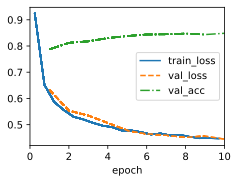

In [5]:
data = aditmaz95.FashionMNIST(batch_size=256)
model = aditmaz95.SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = aditmaz95.Trainer(max_epochs=10)
trainer.fit(model, data)

In [6]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

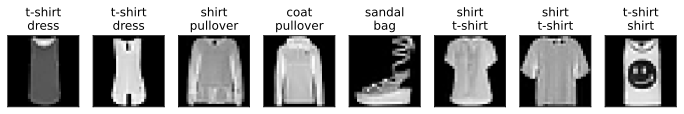

In [7]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)